In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
!pip install pandasql
import pandasql as ps

In [4]:
#Load in CSV's
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
headcount_df = pd.read_csv("/content/drive/MyDrive/Competition/WDC_HEADCOUNT.csv")
person_df = pd.read_csv("/content/drive/MyDrive/Competition/WDC_PERSON.csv")
termination_df = pd.read_csv("/content/drive/MyDrive/Competition/WDC_TERMINATION.csv")
term_sum_df = pd.read_csv("/content/drive/MyDrive/Competition/WDC_terminat_summary.csv")

In [6]:
headcount_df.head()

,PERSON_ID_EMPLOYEE,report_year,report_month,EXEMPT_NONEXEMPT,full_part_time,EMPLOYMENT_STATUS,ON_LEAVE_FLAG,ON_FMLA_LEAVE_FLAG,job_function,home_is_work,home_location,work_location,ORG_CODE,salary_decile,salary_change
0,12581,2020,4,N,Full-Time,A,0,0,job_K,False,Phila,main_campus,Org_1029,10,NaN
1,12581,2020,5,N,Full-Time,A,0,0,job_K,False,Phila,main_campus,Org_1029,10,NaN
2,12581,2020,6,N,Full-Time,P,1,1,job_K,False,Phila,main_campus,Org_1029,10,NaN
3,12581,2020,7,N,Full-Time,P,1,1,job_K,False,Phila,main_campus,Org_1029,10,increase
4,12581,2020,8,N,Full-Time,P,1,1,job_K,False,Phila,main_campus,Org_1029,10,NaN


In [7]:
headcount_df["full_time_flag"] = headcount_df["full_part_time"] == "Full-Time"

headcount_df["EXEMPT_FLAG"] = headcount_df["EXEMPT_NONEXEMPT"] == "E"
jobs_encoded = pd.get_dummies(headcount_df["job_function"])

headcount_df["salary_change"] = headcount_df["salary_change"].fillna('same')
salary_encoded = pd.get_dummies(headcount_df["salary_change"], prefix = "salary")

home_encoded = pd.get_dummies(headcount_df["home_location"], prefix = "home")

headcount_df["main_campus_flag"] = headcount_df["work_location"] == "main_campus"

org_encoded = pd.get_dummies(headcount_df["ORG_CODE"])

headcount_df = pd.concat([headcount_df, jobs_encoded, salary_encoded, home_encoded, org_encoded], axis = 1)
headcount_df

,PERSON_ID_EMPLOYEE,report_year,report_month,EXEMPT_NONEXEMPT,full_part_time,EMPLOYMENT_STATUS,ON_LEAVE_FLAG,ON_FMLA_LEAVE_FLAG,job_function,home_is_work,...,Org_1021,Org_1024,Org_1025,Org_1026,Org_1029,Org_1030,Org_1035,Org_1036,Org_1039,Org_1040
0,12581,2020,4,N,Full-Time,A,0,0,job_K,False,...,0,0,0,0,1,0,0,0,0,0
1,12581,2020,5,N,Full-Time,A,0,0,job_K,False,...,0,0,0,0,1,0,0,0,0,0
2,12581,2020,6,N,Full-Time,P,1,1,job_K,False,...,0,0,0,0,1,0,0,0,0,0
3,12581,2020,7,N,Full-Time,P,1,1,job_K,False,...,0,0,0,0,1,0,0,0,0,0
4,12581,2020,8,N,Full-Time,P,1,1,job_K,False,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320335,28774,2019,11,N,Full-Time,A,0,0,job_D,False,...,0,0,0,0,0,0,0,0,1,0
320336,28774,2019,12,N,Full-Time,A,0,0,job_D,False,...,0,0,0,0,0,0,0,0,1,0
320337,28774,2020,1,N,Full-Time,A,0,0,job_D,False,...,0,0,0,0,0,0,0,0,1,0
320338,28784,2021,9,N,Full-Time,A,0,0,job_K,NaN,...,0,0,0,0,0,0,0,0,0,0


In [8]:
person_df.head()

,PERSON_ID_EMPLOYEE,age_ventile,sex_A_B,race,married_T_F,yrs_of_service,Drct_Rprt_ct,highest_degree
0,12581.0,85p,A,race_D,married_A,3__4-6,NaN,NaN
1,12582.0,75p,B,race_D,married_B,5__15_more,3_6-9DR,NaN
2,12583.0,50p,B,race_B,married_A,5__15_more,NaN,NaN
3,12584.0,35p,A,race_D,married_A,2__2-3,NaN,NaN
4,12585.0,80p,A,race_D,married_B,3__4-6,NaN,NaN


In [ ]:
for col in person_df.columns:
  print(col + ": " + str(person_df[col].unique()))

person_df = person_df.dropna(subset = ["PERSON_ID_EMPLOYEE"], axis = 0)
person_df["age_ventile"] = person_df["age_ventile"].apply(lambda x: int(x[:2]) if len(x) > 2 else int(x[0]))
sex_encoded = pd.get_dummies(person_df["sex_A_B"], prefix = "sex")
race_encoded = pd.get_dummies(person_df["race"])
person_df["married_T_F"] = person_df["married_T_F"] == "married_A"
rep_encoded = pd.get_dummies(person_df["Drct_Rprt_ct"], prefix = "rep")
person_df["highest_degree"] = person_df["highest_degree"].fillna("0")
person_df["highest_degree"] = person_df["highest_degree"].apply(lambda x: int(x[0]))
person_df = pd.concat([person_df, sex_encoded, race_encoded, rep_encoded], axis = 1)


In [10]:
person_df

,PERSON_ID_EMPLOYEE,age_ventile,sex_A_B,race,married_T_F,yrs_of_service,Drct_Rprt_ct,highest_degree,sex_A,sex_B,race A,race_B,race_C,race_D,rep_1_1DR,rep_2_2-5DR,rep_3_6-9DR,rep_4_10+DR
0,12581.0,85,A,race_D,True,3__4-6,NaN,0,1,0,0,0,0,1,0,0,0,0
1,12582.0,75,B,race_D,False,5__15_more,3_6-9DR,0,0,1,0,0,0,1,0,0,1,0
2,12583.0,50,B,race_B,True,5__15_more,NaN,0,0,1,0,1,0,0,0,0,0,0
3,12584.0,35,A,race_D,True,2__2-3,NaN,0,1,0,0,0,0,1,0,0,0,0
4,12585.0,80,A,race_D,False,3__4-6,NaN,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14403,28772.0,70,B,race_B,False,5__15_more,NaN,0,0,1,0,1,0,0,0,0,0,0
14404,28773.0,15,B,race_D,True,3__4-6,NaN,0,0,1,0,0,0,1,0,0,0,0
14405,28774.0,35,B,race A,False,3__4-6,NaN,0,0,1,1,0,0,0,0,0,0,0
14406,28784.0,5,NaN,race_C,False,1__1_or_less,NaN,0,0,0,0,0,1,0,0,0,0,0


In [11]:
termination_df.head()

,PERSON_ID_EMPLOYEE,termination_year,termination_month,invol_terminat,terminate_reason
0,22686,2020,1,Yes,A
1,17401,2020,7,Yes,A
2,22669,2020,6,Yes,A
3,23057,2021,7,Yes,A
4,23917,2021,7,Yes,A


In [12]:
for col in termination_df.columns:
  print(col + ": " + str(termination_df[col].unique()))

termination_df["invol_terminat"] = termination_df["invol_terminat"] == "Yes"
reason_encoded = pd.get_dummies(termination_df["terminate_reason"], prefix = "reason")
termination_df = pd.concat([termination_df, reason_encoded], axis = 1)

PERSON_ID_EMPLOYEE: [22686 17401 22669 ... 27840 18558 12631]
termination_year: [2020 2021 2019 2022]
termination_month: [ 1  7  6  9 11 12  8 10  3  5  2  4]
invol_terminat: ['Yes' nan]
terminate_reason: ['A' 'B' 'X' 'Y' 'Z']


In [13]:
termination_df

,PERSON_ID_EMPLOYEE,termination_year,termination_month,invol_terminat,terminate_reason,reason_A,reason_B,reason_X,reason_Y,reason_Z
0,22686,2020,1,True,A,1,0,0,0,0
1,17401,2020,7,True,A,1,0,0,0,0
2,22669,2020,6,True,A,1,0,0,0,0
3,23057,2021,7,True,A,1,0,0,0,0
4,23917,2021,7,True,A,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3882,25994,2021,10,False,Z,0,0,0,0,1
3883,19560,2021,10,False,Z,0,0,0,0,1
3884,27840,2021,11,False,Z,0,0,0,0,1
3885,18558,2021,10,False,Z,0,0,0,0,1


In [14]:
term_sum_df.head()

,staff_tot,terminat_month,terminat_year,termin_all,termin_voluntary
0,11547,1,2019,144,123
1,11301,1,2018,100,91
2,10904,1,2017,100,75
3,11984,1,2022,160,150
4,11833,1,2021,91,82


# Data Cleaning and Wrangling

In [15]:
# Contains all information for any worker terminated in time frame

terms_info_df = pd.merge(termination_df, headcount_df, on = ['PERSON_ID_EMPLOYEE'], how = 'left').drop(['report_year', 'report_month'], axis = 1).drop_duplicates()
terms_info_df = terms_info_df.merge(person_df, on = ['PERSON_ID_EMPLOYEE'], how = 'left')
terms_info_df

,PERSON_ID_EMPLOYEE,termination_year,termination_month,invol_terminat,terminate_reason,reason_A,reason_B,reason_X,reason_Y,reason_Z,...,sex_A,sex_B,race A,race_B,race_C,race_D,rep_1_1DR,rep_2_2-5DR,rep_3_6-9DR,rep_4_10+DR
0,22686,2020,1,True,A,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,17401,2020,7,True,A,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17401,2020,7,True,A,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22669,2020,6,True,A,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23057,2021,7,True,A,1,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8409,18558,2021,10,False,Z,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8410,18558,2021,10,False,Z,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8411,12631,2021,10,False,Z,0,0,0,0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8412,12631,2021,10,False,Z,0,0,0,0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Contains info for all workers whose 'involuntary termination' flag is not YES

resig_info_df = terms_info_df[terms_info_df['invol_terminat'] != 'Yes'].reset_index(drop = True).drop(['invol_terminat'], axis = 1)
resig_info_df

,PERSON_ID_EMPLOYEE,termination_year,termination_month,terminate_reason,reason_A,reason_B,reason_X,reason_Y,reason_Z,EXEMPT_NONEXEMPT,...,sex_A,sex_B,race A,race_B,race_C,race_D,rep_1_1DR,rep_2_2-5DR,rep_3_6-9DR,rep_4_10+DR
0,22686,2020,1,A,1,0,0,0,0,N,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,17401,2020,7,A,1,0,0,0,0,E,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17401,2020,7,A,1,0,0,0,0,E,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22669,2020,6,A,1,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23057,2021,7,A,1,0,0,0,0,E,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8409,18558,2021,10,Z,0,0,0,0,1,E,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8410,18558,2021,10,Z,0,0,0,0,1,E,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8411,12631,2021,10,Z,0,0,0,0,1,N,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8412,12631,2021,10,Z,0,0,0,0,1,N,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
resig_info_df.columns

Index(['PERSON_ID_EMPLOYEE', 'termination_year', 'termination_month',
       'terminate_reason', 'reason_A', 'reason_B', 'reason_X', 'reason_Y',
       'reason_Z', 'EXEMPT_NONEXEMPT', 'full_part_time', 'EMPLOYMENT_STATUS',
       'ON_LEAVE_FLAG', 'ON_FMLA_LEAVE_FLAG', 'job_function', 'home_is_work',
       'home_location', 'work_location', 'ORG_CODE', 'salary_decile',
       'salary_change', 'full_time_flag', 'EXEMPT_FLAG', 'main_campus_flag',
       'job_B', 'job_C', 'job_D', 'job_F', 'job_H', 'job_I', 'job_J', 'job_K',
       'job_L', 'job_M', 'job_N', 'job_O', 'job_P', 'job_Q', 'job_S',
       'salary_increase', 'salary_large', 'salary_same', 'home_Ex_Region',
       'home_Phila', 'home_Phila_MSA', 'Org_1010', 'Org_1011', 'Org_1013',
       'Org_1014', 'Org_1016', 'Org_1017', 'Org_1019', 'Org_1021', 'Org_1024',
       'Org_1025', 'Org_1026', 'Org_1029', 'Org_1030', 'Org_1035', 'Org_1036',
       'Org_1039', 'Org_1040', 'age_ventile', 'sex_A_B', 'race', 'married_T_F',
       'yrs_of_

In [18]:
headcount_df

,PERSON_ID_EMPLOYEE,report_year,report_month,EXEMPT_NONEXEMPT,full_part_time,EMPLOYMENT_STATUS,ON_LEAVE_FLAG,ON_FMLA_LEAVE_FLAG,job_function,home_is_work,...,Org_1021,Org_1024,Org_1025,Org_1026,Org_1029,Org_1030,Org_1035,Org_1036,Org_1039,Org_1040
0,12581,2020,4,N,Full-Time,A,0,0,job_K,False,...,0,0,0,0,1,0,0,0,0,0
1,12581,2020,5,N,Full-Time,A,0,0,job_K,False,...,0,0,0,0,1,0,0,0,0,0
2,12581,2020,6,N,Full-Time,P,1,1,job_K,False,...,0,0,0,0,1,0,0,0,0,0
3,12581,2020,7,N,Full-Time,P,1,1,job_K,False,...,0,0,0,0,1,0,0,0,0,0
4,12581,2020,8,N,Full-Time,P,1,1,job_K,False,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320335,28774,2019,11,N,Full-Time,A,0,0,job_D,False,...,0,0,0,0,0,0,0,0,1,0
320336,28774,2019,12,N,Full-Time,A,0,0,job_D,False,...,0,0,0,0,0,0,0,0,1,0
320337,28774,2020,1,N,Full-Time,A,0,0,job_D,False,...,0,0,0,0,0,0,0,0,1,0
320338,28784,2021,9,N,Full-Time,A,0,0,job_K,NaN,...,0,0,0,0,0,0,0,0,0,0


In [19]:
headcount_detail_df = headcount_df.merge(person_df, on = ['PERSON_ID_EMPLOYEE'], how = 'left')
headcount_detail_df['salary_change'] = headcount_detail_df['salary_change'].apply(lambda x: 1 if x == 'increase' else 0)
headcount_detail_df['home_is_work'] = headcount_detail_df['home_is_work'].apply(lambda x: 1 if x == True else 0)
headcount_detail_df['full_part_time'] = headcount_detail_df['full_part_time'].apply(lambda x: 1 if x == 'Full-Time' else 0)

headcount_detail_df

,PERSON_ID_EMPLOYEE,report_year,report_month,EXEMPT_NONEXEMPT,full_part_time,EMPLOYMENT_STATUS,ON_LEAVE_FLAG,ON_FMLA_LEAVE_FLAG,job_function,home_is_work,...,sex_A,sex_B,race A,race_B,race_C,race_D,rep_1_1DR,rep_2_2-5DR,rep_3_6-9DR,rep_4_10+DR
0,12581,2020,4,N,1,A,0,0,job_K,0,...,1,0,0,0,0,1,0,0,0,0
1,12581,2020,5,N,1,A,0,0,job_K,0,...,1,0,0,0,0,1,0,0,0,0
2,12581,2020,6,N,1,P,1,1,job_K,0,...,1,0,0,0,0,1,0,0,0,0
3,12581,2020,7,N,1,P,1,1,job_K,0,...,1,0,0,0,0,1,0,0,0,0
4,12581,2020,8,N,1,P,1,1,job_K,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320335,28774,2019,11,N,1,A,0,0,job_D,0,...,0,1,1,0,0,0,0,0,0,0
320336,28774,2019,12,N,1,A,0,0,job_D,0,...,0,1,1,0,0,0,0,0,0,0
320337,28774,2020,1,N,1,A,0,0,job_D,0,...,0,1,1,0,0,0,0,0,0,0
320338,28784,2021,9,N,1,A,0,0,job_K,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
from datetime import datetime

def f(month, year):
  datestring = f'{month}-{year}'
  return datetime.strptime(datestring, "%m-%Y")

term_sum_df['date'] = term_sum_df.apply(lambda x: f(x.terminat_month, x.terminat_year), axis=1)

In [21]:
term_sum_df = term_sum_df.sort_values(by = ['date']).reset_index()
term_sum_df['percent_termin_voluntary'] = term_sum_df['termin_voluntary']/term_sum_df['staff_tot']
term_sum_df['avg_termin_voluntary'] = term_sum_df['percent_termin_voluntary'].rolling(12).mean()
term_sum_df.head()

,index,staff_tot,terminat_month,terminat_year,termin_all,termin_voluntary,date,percent_termin_voluntary,avg_termin_voluntary
0,34,10579,7,2016,139,109,2016-07-01,0.010303,NaN
1,40,10639,8,2016,102,75,2016-08-01,0.007050,NaN
2,45,10708,9,2016,100,85,2016-09-01,0.007938,NaN
3,51,10766,10,2016,81,60,2016-10-01,0.005573,NaN
4,56,10843,11,2016,62,52,2016-11-01,0.004796,NaN


# Visualization

Text(0.5, 1.0, 'Rolling Average of Percent of Workforce Voluntarily Terminating')

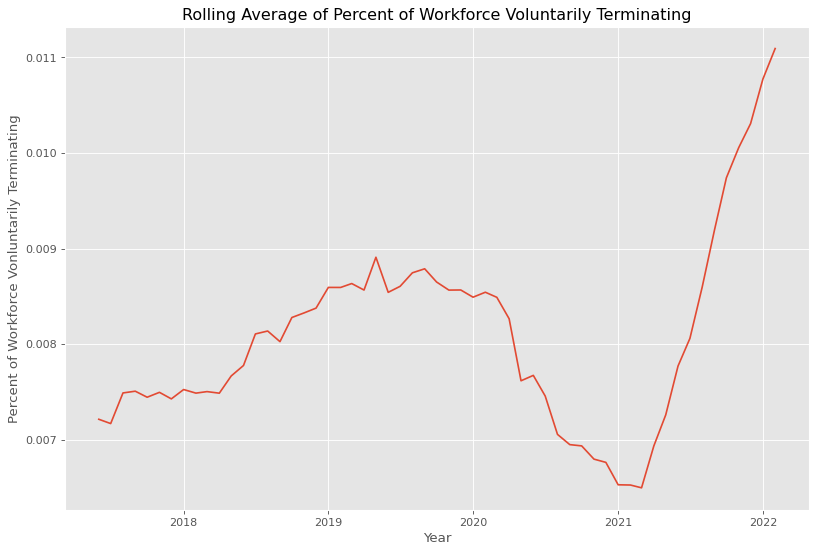

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
plt.style.use('ggplot')

figure(figsize=(12, 8), dpi=80)

plt.plot(term_sum_df['date'], term_sum_df['avg_termin_voluntary'])
plt.xlabel('Year')
plt.ylabel('Percent of Workforce Vonluntarily Terminating')
plt.title('Rolling Average of Percent of Workforce Voluntarily Terminating')

In [23]:
headcount_monthly_df = headcount_detail_df.groupby(by = ['report_year', 'report_month', 'sex_A']).count()[['PERSON_ID_EMPLOYEE']].rename(columns={"PERSON_ID_EMPLOYEE": "Total_Headcount"})
headcount_monthly_df

Total_Headcount
report_year report_month sex_A                 
2019        8            0                 3397
                         1                 6280
            9            0                 3420
                         1                 6312
            10           0                 3451
...                                         ...
2021        12           1                 6854
2022        1            0                 3691
                         1                 6853
            2            0                 3695
                         1                 6865

[62 rows x 1 columns]

In [24]:
resig_monthly_df = resig_info_df.groupby(by = ['termination_year', 'termination_month', 'sex_A']).count()[['PERSON_ID_EMPLOYEE']].rename(columns={"PERSON_ID_EMPLOYEE": "Termination_Count"})
resig_monthly_df

Termination_Count
termination_year termination_month sex_A                   
2019             7                 0.0                   18
                                   1.0                   42
                 8                 0.0                   47
                                   1.0                  110
                 9                 0.0                   33
...                                                     ...
2021             12                1.0                  244
2022             1                 0.0                  137
                                   1.0                  394
                 2                 0.0                   99
                                   1.0                  285

[64 rows x 1 columns]

In [25]:
resig_sex = pd.concat([headcount_monthly_df, resig_monthly_df],axis=1).dropna()
resig_sex['Percent_Resig'] = resig_sex['Termination_Count'] / resig_sex['Total_Headcount']
resig_sex.reset_index(inplace = True)
resig_sex = resig_sex.rename(columns = {'level_0': 'Year', 'level_1': 'Month'})
resig_sex['Date'] = resig_sex.apply(lambda x: f(int(x.Month), int(x.Year)), axis=1)

In [26]:
resig_sex_totals = resig_sex.groupby(['sex_A']).sum()
resig_sex_totals['Percent_Resig'] = resig_sex_totals['Termination_Count'] / resig_sex_totals['Total_Headcount']
resig_sex_totals = resig_sex_totals.drop(['Year', 'Month'], axis = 1)
resig_sex_totals = resig_sex_totals.reset_index()
resig_sex_totals

,sex_A,Total_Headcount,Termination_Count,Percent_Resig
0,0.0,112400.0,2563,0.022802
1,1.0,207940.0,5475,0.026330


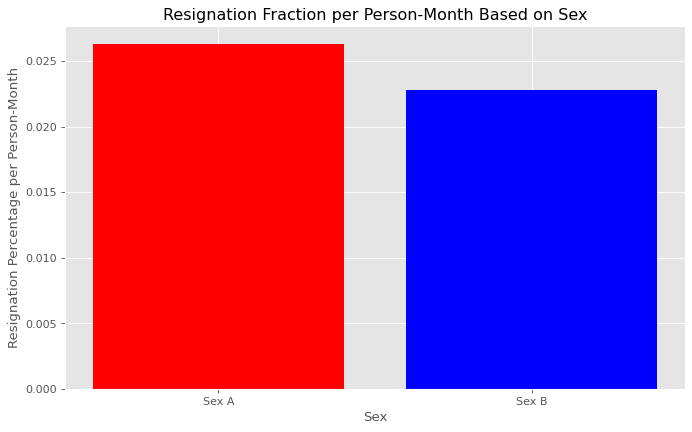

In [27]:
%matplotlib inline
plt.style.use('ggplot')
figure(figsize=(10, 6), dpi=80)

sex = [1, 0]
count = [resig_sex_totals[resig_sex_totals['sex_A'] == x]['Percent_Resig'].values[0] for x in sex]

x_pos = [i for i, _ in enumerate(sex)]

plt.bar(x_pos, count, color=['red', 'blue'])
plt.xlabel("Sex")
plt.ylabel("Resignation Percentage per Person-Month")
plt.title("Resignation Fraction per Person-Month Based on Sex")

plt.xticks(x_pos, ['Sex A', 'Sex B'])

plt.show()

Text(0.5, 1.0, 'Workforce Termination Rates Based on Sex')

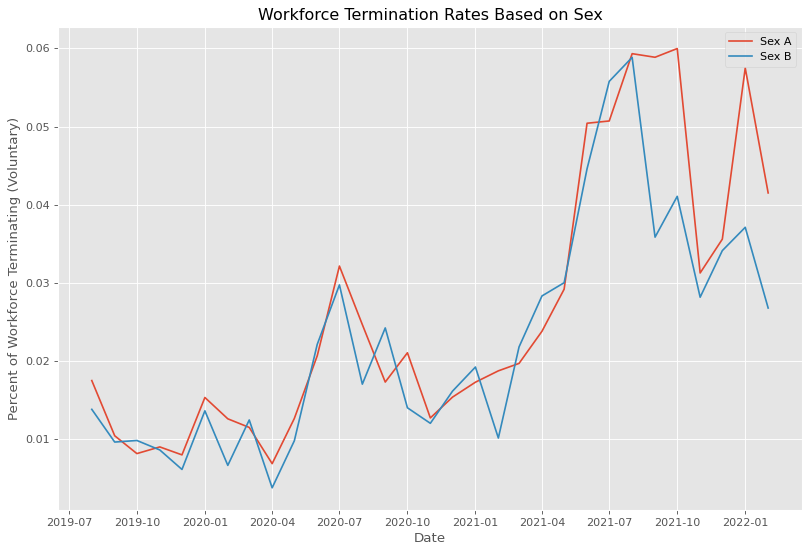

In [28]:
sex_0_df = resig_sex[resig_sex['sex_A'] == 0]
sex_1_df = resig_sex[resig_sex['sex_A'] == 1]
plt.style.use('ggplot')

figure(figsize=(12, 8), dpi=80)
plt.plot(sex_1_df['Date'], sex_1_df['Percent_Resig'], label = 'Sex A')
plt.plot(sex_0_df['Date'], sex_0_df['Percent_Resig'], label = 'Sex B')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Percent of Workforce Terminating (Voluntary)')
plt.title('Workforce Termination Rates Based on Sex')

In [29]:
person_df.columns

Index(['PERSON_ID_EMPLOYEE', 'age_ventile', 'sex_A_B', 'race', 'married_T_F',
       'yrs_of_service', 'Drct_Rprt_ct', 'highest_degree', 'sex_A', 'sex_B',
       'race A', 'race_B', 'race_C', 'race_D', 'rep_1_1DR', 'rep_2_2-5DR',
       'rep_3_6-9DR', 'rep_4_10+DR'],
      dtype='object')

In [30]:
resig_monthly_df = resig_info_df.groupby(by = ['termination_year', 'termination_month', 'race']).count()[['PERSON_ID_EMPLOYEE']].rename(columns={"PERSON_ID_EMPLOYEE": "Termination_Count"})
headcount_monthly_df = headcount_detail_df.groupby(by = ['report_year', 'report_month', 'race']).count()[['PERSON_ID_EMPLOYEE']].rename(columns={"PERSON_ID_EMPLOYEE": "Total_Headcount"})

In [31]:
resig_race = pd.concat([headcount_monthly_df, resig_monthly_df],axis=1).dropna()
resig_race['Percent_Resig'] = resig_race['Termination_Count'] / resig_race['Total_Headcount']
resig_race.reset_index(inplace = True)
resig_race = resig_race.rename(columns = {'level_0': 'Year', 'level_1': 'Month'})
resig_race['Date'] = resig_race.apply(lambda x: f(int(x.Month), int(x.Year)), axis=1)

In [32]:
resig_race

,Year,Month,race,Total_Headcount,Termination_Count,Percent_Resig,Date
0,2019,8,race A,1425.0,22.0,0.015439,2019-08-01
1,2019,8,race_B,1105.0,15.0,0.013575,2019-08-01
2,2019,8,race_C,556.0,8.0,0.014388,2019-08-01
3,2019,8,race_D,6591.0,112.0,0.016993,2019-08-01
4,2019,9,race A,1441.0,14.0,0.009715,2019-09-01
...,...,...,...,...,...,...,...
118,2022,1,race_D,6759.0,343.0,0.050747,2022-01-01
119,2022,2,race A,1569.0,46.0,0.029318,2022-02-01
120,2022,2,race_B,1316.0,51.0,0.038754,2022-02-01
121,2022,2,race_C,907.0,53.0,0.058434,2022-02-01


In [33]:
resig_race_totals = resig_race.groupby(['race']).sum()
resig_race_totals['Percent_Resig'] = resig_race_totals['Termination_Count'] / resig_race_totals['Total_Headcount']
resig_race_totals = resig_race_totals.drop(['Year', 'Month'], axis = 1)
resig_race_totals = resig_race_totals.reset_index()
resig_race_totals['race'] = resig_race_totals['race'].apply(lambda x: x.replace(" ", "_"))
resig_race_totals

,race,Total_Headcount,Termination_Count,Percent_Resig
0,race_A,46857.0,1240.0,0.026463
1,race_B,38558.0,1022.0,0.026506
2,race_C,23426.0,769.0,0.032827
3,race_D,210814.0,5007.0,0.023751


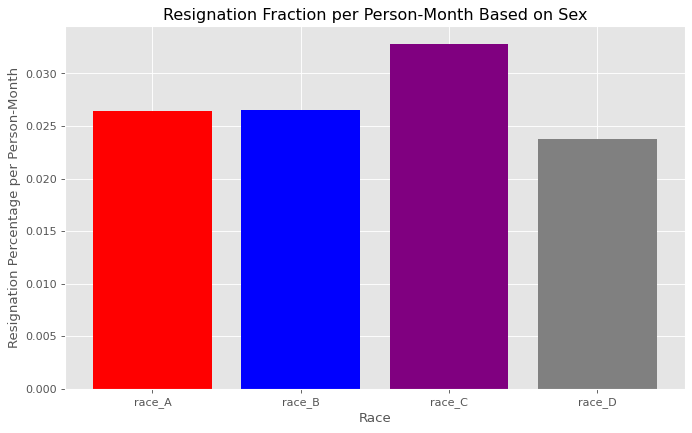

In [34]:
%matplotlib inline
plt.style.use('ggplot')
figure(figsize=(10, 6), dpi=80)

race_letters = ['A', 'B', 'C', 'D']
race = ["race_" + x for x in race_letters]
count = [resig_race_totals[resig_race_totals['race'] == x]['Percent_Resig'].values[0] for x in race]

x_pos = [i for i, _ in enumerate(race)]

plt.bar(x_pos, count, color=['red', 'blue', 'purple', 'gray'])
plt.xlabel("Race")
plt.ylabel("Resignation Percentage per Person-Month")
plt.title("Resignation Fraction per Person-Month Based on Sex")

plt.xticks(x_pos, race)

plt.show()

Text(0.5, 1.0, 'Workforce Termination Rates Based on Race')

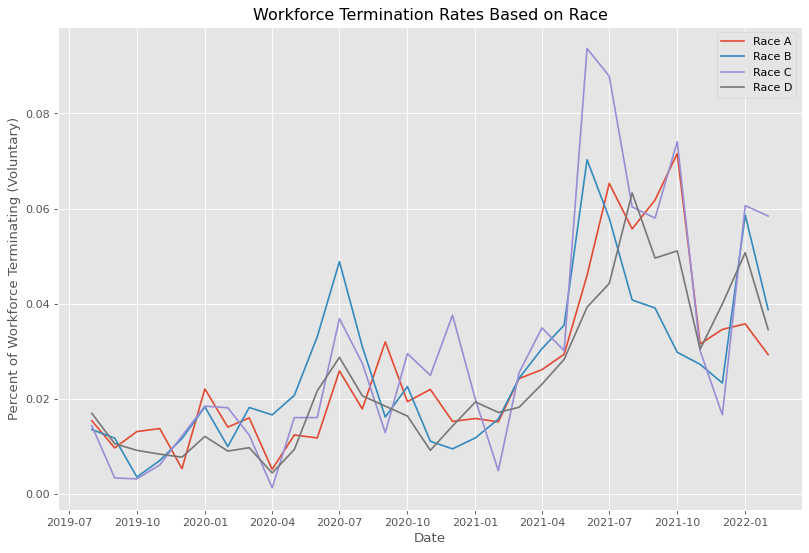

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.plot(resig_race[resig_race['race'] == 'race A']['Date'], resig_race[resig_race['race'] == 'race A']['Percent_Resig'], label = 'Race A')
plt.plot(resig_race[resig_race['race'] == 'race_B']['Date'], resig_race[resig_race['race'] == 'race_B']['Percent_Resig'], label = 'Race B')
plt.plot(resig_race[resig_race['race'] == 'race_C']['Date'], resig_race[resig_race['race'] == 'race_C']['Percent_Resig'], label = 'Race C')
plt.plot(resig_race[resig_race['race'] == 'race_D']['Date'], resig_race[resig_race['race'] == 'race_D']['Percent_Resig'], label = 'Race D')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Percent of Workforce Terminating (Voluntary)')
plt.title('Workforce Termination Rates Based on Race')

In [ ]:
resig_monthly_df = resig_info_df.groupby(by = ['termination_year', 'termination_month', 'age_ventile']).count()[['PERSON_ID_EMPLOYEE']].rename(columns={"PERSON_ID_EMPLOYEE": "Termination_Count"})
headcount_monthly_df = headcount_detail_df.groupby(by = ['report_year', 'report_month', 'age_ventile']).count()[['PERSON_ID_EMPLOYEE']].rename(columns={"PERSON_ID_EMPLOYEE": "Total_Headcount"})

In [ ]:
resig_age = pd.concat([headcount_monthly_df, resig_monthly_df],axis=1).dropna()
resig_age['Percent_Resig'] = resig_age['Termination_Count'] / resig_age['Total_Headcount']
resig_age.reset_index(inplace = True)
resig_age = resig_age.rename(columns = {'level_0': 'Year', 'level_1': 'Month'})
resig_age['Date'] = resig_age.apply(lambda x: f(int(x.Month), int(x.Year)), axis=1)

In [ ]:
resig_age

,Year,Month,age_ventile,Total_Headcount,Termination_Count,Percent_Resig,Date
0,2019,8,5.0,19.0,2.0,0.105263,2019-08-01
1,2019,8,10.0,867.0,12.0,0.013841,2019-08-01
2,2019,8,15.0,426.0,11.0,0.025822,2019-08-01
3,2019,8,20.0,224.0,9.0,0.040179,2019-08-01
4,2019,8,25.0,521.0,26.0,0.049904,2019-08-01
...,...,...,...,...,...,...,...
502,2022,2,65.0,689.0,17.0,0.024673,2022-02-01
503,2022,2,70.0,641.0,26.0,0.040562,2022-02-01
504,2022,2,75.0,674.0,13.0,0.019288,2022-02-01
505,2022,2,80.0,1202.0,39.0,0.032446,2022-02-01


In [ ]:
resig_age_totals = resig_age.groupby(['age_ventile']).sum()
resig_age_totals['Percent_Resig'] = resig_age_totals['Termination_Count'] / resig_age_totals['Total_Headcount']
resig_age_totals = resig_age_totals.drop(['Year', 'Month'], axis = 1)
resig_age_totals = resig_age_totals.reset_index()
resig_age_totals

,age_ventile,Total_Headcount,Termination_Count,Percent_Resig
0,5.0,5243.0,175.0,0.033378
1,10.0,26906.0,1099.0,0.040846
2,15.0,16014.0,982.0,0.061321
3,20.0,7877.0,390.0,0.049511
4,25.0,17279.0,736.0,0.042595
5,30.0,8784.0,399.0,0.045423
6,35.0,17688.0,677.0,0.038275
7,40.0,17429.0,589.0,0.033794
8,45.0,15018.0,416.0,0.027700
9,50.0,17336.0,409.0,0.023593


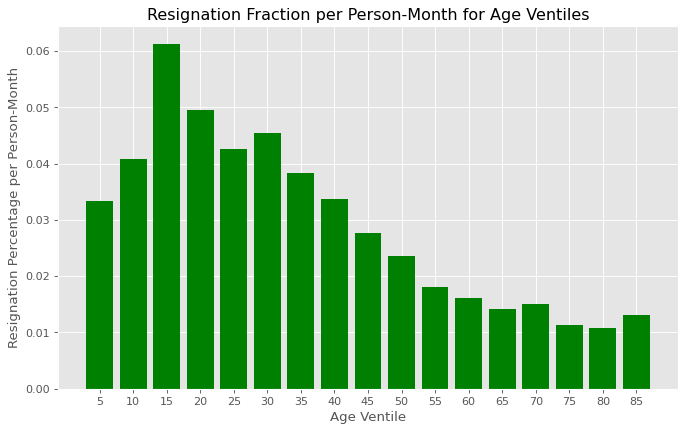

In [ ]:
%matplotlib inline
plt.style.use('ggplot')
figure(figsize=(10, 6), dpi=80)

ages = [i*5 for i in range(1, 18)]
count = [resig_age_totals[resig_age_totals['age_ventile'] == x]['Percent_Resig'].values[0] for x in ages]

x_pos = [i for i, _ in enumerate(ages)]

plt.bar(x_pos, count, color='green')
plt.xlabel("Age Ventile")
plt.ylabel("Resignation Percentage per Person-Month")
plt.title("Resignation Fraction per Person-Month for Age Ventiles")

plt.xticks(x_pos, ages)

plt.show()

Text(0.5, 1.0, 'Workforce Termination Rates Based on Age Ventile')

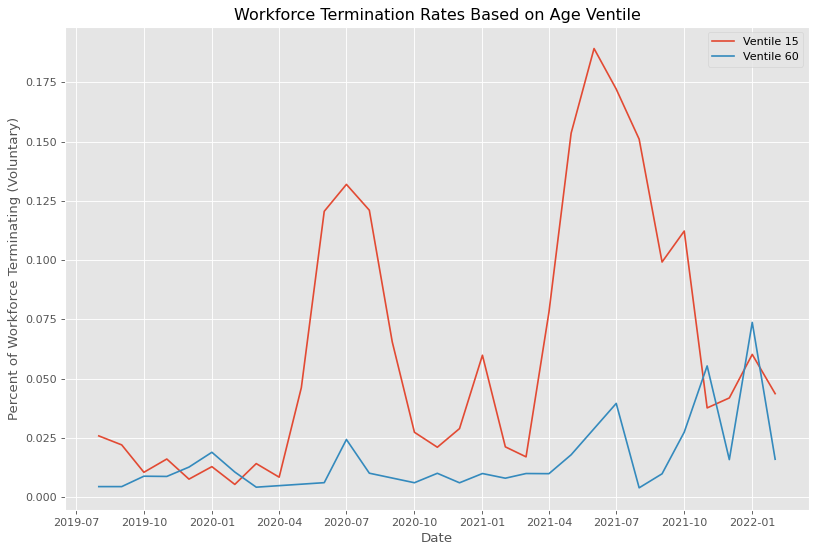

In [ ]:
figure(figsize=(12, 8), dpi=80)

plt.plot(resig_age[resig_age['age_ventile'] == 15]['Date'], resig_age[resig_age['age_ventile'] == 15]['Percent_Resig'], label = f'Ventile {15}')
plt.plot(resig_age[resig_age['age_ventile'] == 60]['Date'], resig_age[resig_age['age_ventile'] == 60]['Percent_Resig'], label = f'Ventile {60}')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Percent of Workforce Terminating (Voluntary)')
plt.title('Workforce Termination Rates Based on Age Ventile')

In [ ]:
resig_monthly_df = resig_info_df.groupby(by = ['termination_year', 'termination_month', 'salary_decile']).count()[['PERSON_ID_EMPLOYEE']].rename(columns={"PERSON_ID_EMPLOYEE": "Termination_Count"})
headcount_monthly_df = headcount_detail_df.groupby(by = ['report_year', 'report_month', 'salary_decile']).count()[['PERSON_ID_EMPLOYEE']].rename(columns={"PERSON_ID_EMPLOYEE": "Total_Headcount"})

resig_sal = pd.concat([headcount_monthly_df, resig_monthly_df],axis=1).dropna()
resig_sal['Percent_Resig'] = resig_sal['Termination_Count'] / resig_sal['Total_Headcount']
resig_sal.reset_index(inplace = True)
resig_sal = resig_sal.rename(columns = {'level_0': 'Year', 'level_1': 'Month'})
resig_sal['Date'] = resig_sal.apply(lambda x: f(int(x.Month), int(x.Year)), axis=1)

resig_sal

,Year,Month,salary_decile,Total_Headcount,Termination_Count,Percent_Resig,Date
0,2019,8,10.0,1107.0,10.0,0.009033,2019-08-01
1,2019,8,20.0,940.0,5.0,0.005319,2019-08-01
2,2019,8,30.0,1029.0,5.0,0.004859,2019-08-01
3,2019,8,40.0,941.0,6.0,0.006376,2019-08-01
4,2019,8,50.0,897.0,4.0,0.004459,2019-08-01
...,...,...,...,...,...,...,...
303,2022,2,60.0,1133.0,40.0,0.035305,2022-02-01
304,2022,2,70.0,1158.0,43.0,0.037133,2022-02-01
305,2022,2,80.0,1071.0,44.0,0.041083,2022-02-01
306,2022,2,90.0,1031.0,24.0,0.023278,2022-02-01


In [ ]:
resig_sal_totals = resig_sal.groupby(['salary_decile']).sum()
resig_sal_totals['Percent_Resig'] = resig_sal_totals['Termination_Count'] / resig_sal_totals['Total_Headcount']
resig_sal_totals = resig_sal_totals.drop(['Year', 'Month'], axis = 1)
resig_sal_totals = resig_sal_totals.reset_index()
resig_sal_totals

,salary_decile,Total_Headcount,Termination_Count,Percent_Resig
0,10.0,31486.0,1618.0,0.051388
1,20.0,31760.0,1291.0,0.040649
2,30.0,32115.0,999.0,0.031107
3,40.0,32455.0,913.0,0.028131
4,50.0,30618.0,767.0,0.025051
5,60.0,33542.0,592.0,0.017650
6,70.0,31545.0,489.0,0.015502
7,80.0,31510.0,453.0,0.014376
8,90.0,30235.0,396.0,0.013097
9,100.0,33089.0,392.0,0.011847


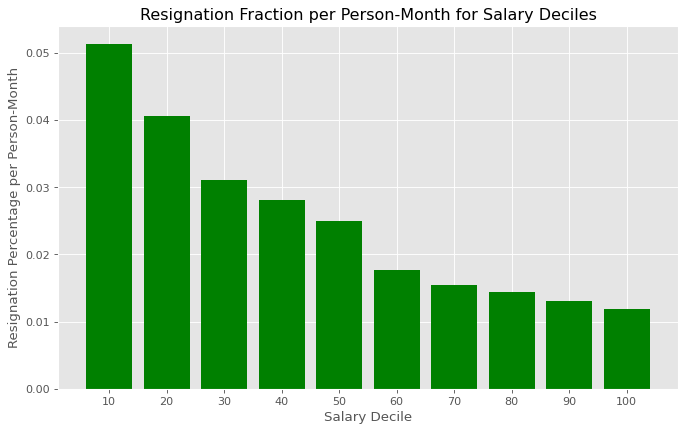

In [ ]:
%matplotlib inline
plt.style.use('ggplot')
figure(figsize=(10, 6), dpi=80)

deciles = [i*10 for i in range(1, 11)]
count = [resig_sal_totals[resig_sal_totals['salary_decile'] == x]['Percent_Resig'].values[0] for x in deciles]

x_pos = [i for i, _ in enumerate(deciles)]

plt.bar(x_pos, count, color='green')
plt.xlabel("Salary Decile")
plt.ylabel("Resignation Percentage per Person-Month")
plt.title("Resignation Fraction per Person-Month for Salary Deciles")

plt.xticks(x_pos, deciles)

plt.show()

Text(0.5, 1.0, 'Workforce Termination Rates Based on Salary Decile')

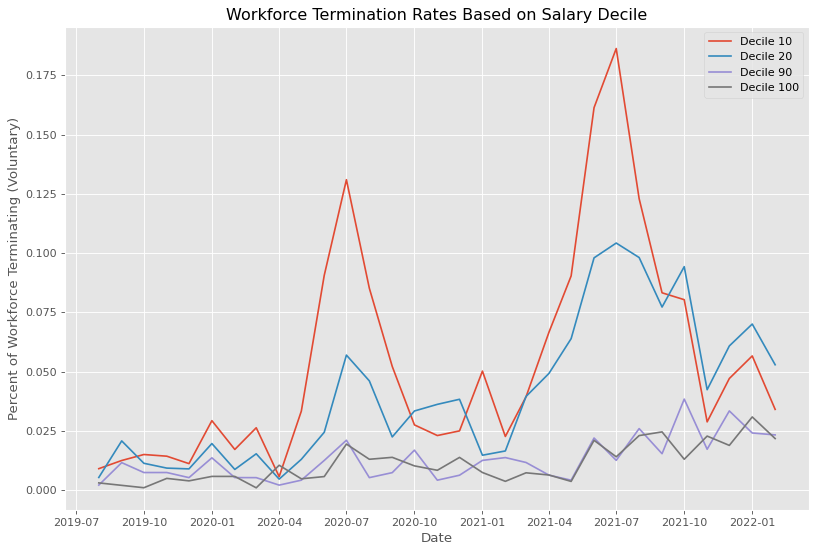

In [ ]:
figure(figsize=(12, 8), dpi=80)

for i in range(1, 3):
  plt.plot(resig_sal[resig_sal['salary_decile'] == i*10]['Date'], resig_sal[resig_sal['salary_decile'] == i*10]['Percent_Resig'], label = f'Decile {i*10}')
for i in range(9, 11):
  plt.plot(resig_sal[resig_sal['salary_decile'] == i*10]['Date'], resig_sal[resig_sal['salary_decile'] == i*10]['Percent_Resig'], label = f'Decile {i*10}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Percent of Workforce Terminating (Voluntary)')
plt.title('Workforce Termination Rates Based on Salary Decile')

In [ ]:
resig_monthly_df = resig_info_df.groupby(by = ['termination_year', 'termination_month', 'job_function']).count()[['PERSON_ID_EMPLOYEE']].rename(columns={"PERSON_ID_EMPLOYEE": "Termination_Count"})
headcount_monthly_df = headcount_detail_df.groupby(by = ['report_year', 'report_month', 'job_function']).count()[['PERSON_ID_EMPLOYEE']].rename(columns={"PERSON_ID_EMPLOYEE": "Total_Headcount"})
resig_job = pd.concat([headcount_monthly_df, resig_monthly_df],axis=1).dropna()
resig_job['Percent_Resig'] = resig_job['Termination_Count'] / resig_job['Total_Headcount']
resig_job.reset_index(inplace = True)
resig_job = resig_job.rename(columns = {'level_0': 'Year', 'level_1': 'Month'})
resig_job['Date'] = resig_job.apply(lambda x: f(int(x.Month), int(x.Year)), axis=1)

In [ ]:
resig_job

,Year,Month,job_function,Total_Headcount,Termination_Count,Percent_Resig,Date
0,2019,8,job_B,530.0,1.0,0.001887,2019-08-01
1,2019,8,job_D,1832.0,16.0,0.008734,2019-08-01
2,2019,8,job_H,342.0,3.0,0.008772,2019-08-01
3,2019,8,job_J,1022.0,1.0,0.000978,2019-08-01
4,2019,8,job_K,1917.0,1.0,0.000522,2019-08-01
...,...,...,...,...,...,...,...
359,2022,2,job_N,100.0,7.0,0.070000,2022-02-01
360,2022,2,job_O,1355.0,45.0,0.033210,2022-02-01
361,2022,2,job_P,1744.0,64.0,0.036697,2022-02-01
362,2022,2,job_Q,113.0,1.0,0.008850,2022-02-01


In [ ]:
resig_job_totals = resig_job.groupby(['job_function']).sum()
resig_job_totals['Percent_Resig'] = resig_job_totals['Termination_Count'] / resig_job_totals['Total_Headcount']
resig_job_totals = resig_job_totals.drop(['Year', 'Month'], axis = 1)
resig_job_totals = resig_job_totals.reset_index()
resig_job_totals

,job_function,Total_Headcount,Termination_Count,Percent_Resig
0,job_B,14047.0,236.0,0.016801
1,job_C,276.0,21.0,0.076087
2,job_D,67075.0,2686.0,0.040045
3,job_F,950.0,53.0,0.055789
4,job_H,10756.0,262.0,0.024358
5,job_I,651.0,31.0,0.047619
6,job_J,31681.0,487.0,0.015372
7,job_K,60287.0,1637.0,0.027153
8,job_L,11371.0,361.0,0.031747
9,job_M,9619.0,167.0,0.017361


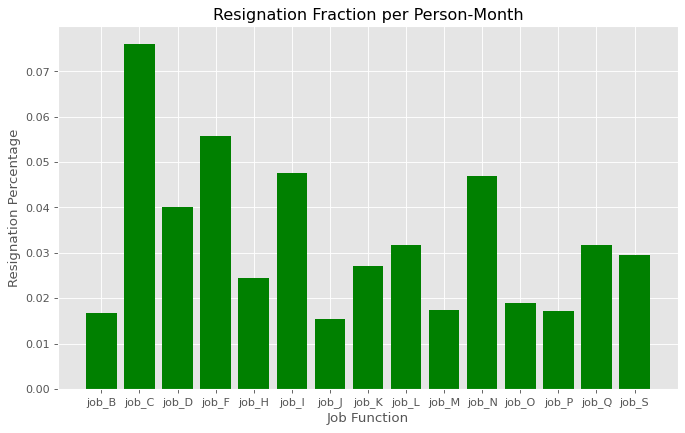

In [ ]:
%matplotlib inline
plt.style.use('ggplot')
figure(figsize=(10, 6), dpi=80)

jobs = ['B', 'C', 'D', 'F', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'S']
jobs = ['job_' + x for x in jobs]
count = [resig_job_totals[resig_job_totals['job_function'] == x]['Percent_Resig'].values[0] for x in jobs]

x_pos = [i for i, _ in enumerate(jobs)]

plt.bar(x_pos, count, color='green')
plt.xlabel("Job Function")
plt.ylabel("Resignation Percentage")
plt.title("Resignation Fraction per Person-Month")

plt.xticks(x_pos, jobs)

plt.show()

Text(0.5, 1.0, 'Workforce Termination Rates Based on Job')

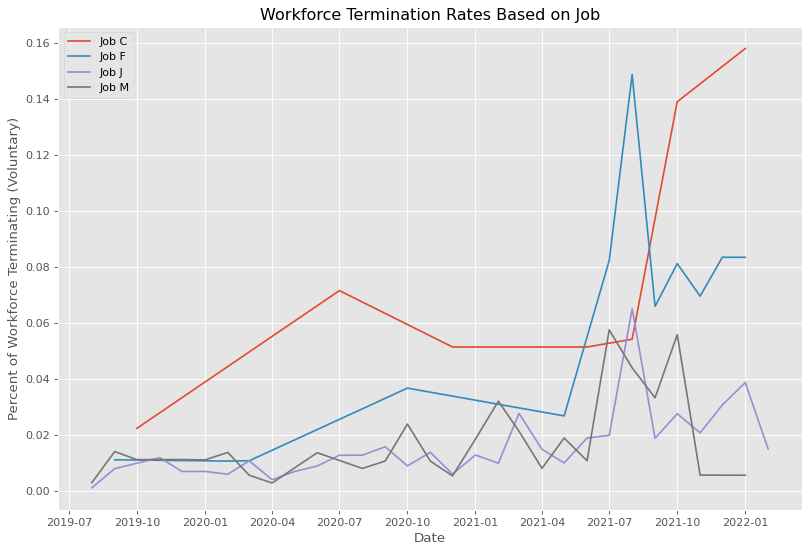

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.plot(resig_job[resig_job['job_function'] == 'job_C']['Date'], resig_job[resig_job['job_function'] == 'job_C']['Percent_Resig'], label = 'Job C')
plt.plot(resig_job[resig_job['job_function'] == 'job_F']['Date'], resig_job[resig_job['job_function'] == 'job_F']['Percent_Resig'], label = 'Job F')
plt.plot(resig_job[resig_job['job_function'] == 'job_J']['Date'], resig_job[resig_job['job_function'] == 'job_J']['Percent_Resig'], label = 'Job J')
plt.plot(resig_job[resig_job['job_function'] == 'job_M']['Date'], resig_job[resig_job['job_function'] == 'job_M']['Percent_Resig'], label = 'Job M')



plt.legend()
plt.xlabel('Date')
plt.ylabel('Percent of Workforce Terminating (Voluntary)')
plt.title('Workforce Termination Rates Based on Job')

# Modeling

In [ ]:
data_df = headcount_detail_df.select_dtypes(['number']).drop(['salary_change', 'salary_same', 'ON_LEAVE_FLAG', 'ON_FMLA_LEAVE_FLAG', 'report_year', 'report_month'], axis = 1).drop_duplicates(subset = 'PERSON_ID_EMPLOYEE', keep = 'last').reset_index(drop = True)

In [ ]:
data_df.columns

Index(['PERSON_ID_EMPLOYEE', 'full_part_time', 'home_is_work', 'salary_decile',
       'job_B', 'job_C', 'job_D', 'job_F', 'job_H', 'job_I', 'job_J', 'job_K',
       'job_L', 'job_M', 'job_N', 'job_O', 'job_P', 'job_Q', 'job_S',
       'salary_increase', 'salary_large', 'home_Ex_Region', 'home_Phila',
       'home_Phila_MSA', 'Org_1010', 'Org_1011', 'Org_1013', 'Org_1014',
       'Org_1016', 'Org_1017', 'Org_1019', 'Org_1021', 'Org_1024', 'Org_1025',
       'Org_1026', 'Org_1029', 'Org_1030', 'Org_1035', 'Org_1036', 'Org_1039',
       'Org_1040', 'age_ventile', 'highest_degree', 'sex_A', 'sex_B', 'race A',
       'race_B', 'race_C', 'race_D', 'rep_1_1DR', 'rep_2_2-5DR', 'rep_3_6-9DR',
       'rep_4_10+DR'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

data = data_df.merge(resig_info_df[['PERSON_ID_EMPLOYEE']], on = ['PERSON_ID_EMPLOYEE'], how = 'outer', indicator = "Resigned")
data['Resigned'] = data['Resigned'].apply(lambda x: 0 if x == 'left_only' else 1)
#data = data[['PERSON_ID_EMPLOYEE', 'age_ventile', 'married_T_F', 'highest_degree', 'sex_A', 'sex_B', 'race A', 'race_B', 'race_C', 'race_D', 'rep_1_1DR', 'rep_2_2-5DR', 'rep_3_6-9DR', 'rep_4_10+DR', 'Resigned']]
data = data.dropna()
data = data.drop(['PERSON_ID_EMPLOYEE'], axis = 1)

X = data[['full_part_time', 'home_is_work', 'salary_decile',
       'job_B', 'job_C', 'job_D', 'job_F', 'job_H', 'job_I', 'job_J', 'job_K',
       'job_L', 'job_M', 'job_N', 'job_O', 'job_P', 'job_Q', 'job_S',
       'salary_increase', 'salary_large', 'home_Ex_Region', 'home_Phila',
       'home_Phila_MSA', 'Org_1010', 'Org_1011', 'Org_1013', 'Org_1014',
       'Org_1016', 'Org_1017', 'Org_1019', 'Org_1021', 'Org_1024', 'Org_1025',
       'Org_1026', 'Org_1029', 'Org_1030', 'Org_1035', 'Org_1036', 'Org_1039',
       'Org_1040', 'age_ventile', 'highest_degree', 'sex_A', 'sex_B', 'race A',
       'race_B', 'race_C', 'race_D', 'rep_1_1DR', 'rep_2_2-5DR', 'rep_3_6-9DR',
       'rep_4_10+DR']]
y = data[['Resigned']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

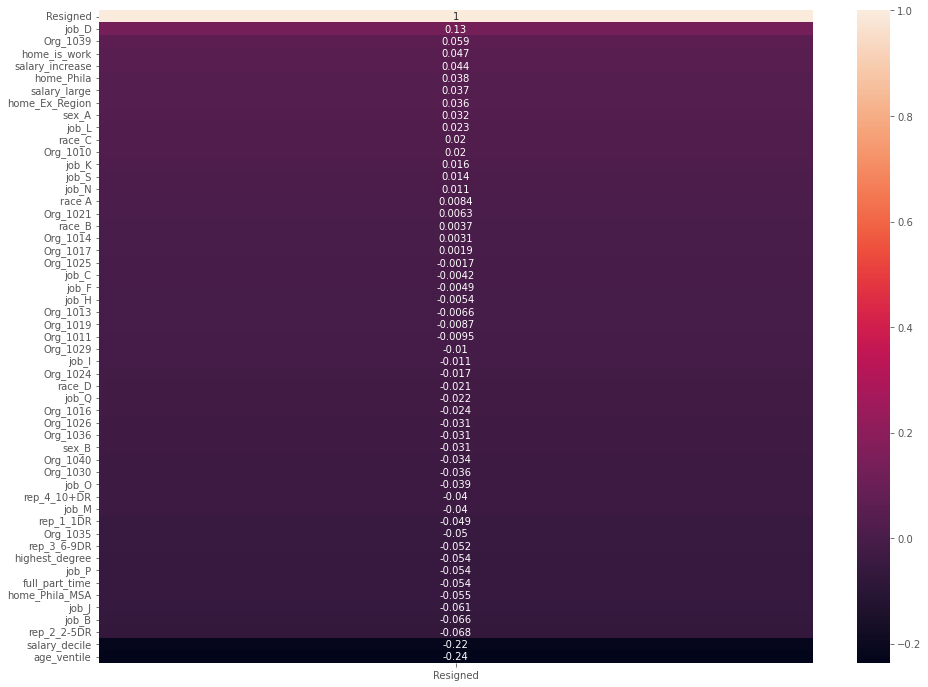

In [ ]:
corr = data.corr()[['Resigned']].sort_values(by = ['Resigned'], ascending = False)
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.svm import SVC

from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Statistics
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
def model_info(mod, x, y, name, typem):
  accs = (accuracy_score(y, mod.predict(x)), recall_score(y, mod.predict(x)), precision_score(y, mod.predict(x)))
  result = f"{name} {typem} data: accuracy = {str(round(accs[0], 3))}, recall = {str(round(accs[1], 3))}, precision = {str(round(accs[2], 3))}"
  return result

In [ ]:
clf_logistic = LogisticRegression().fit(X_train, y_train.values.ravel()) # BEST MODEL FOR LOGISTIC REGRESSION
l1_logit = LogisticRegression(penalty = 'l1', solver = 'saga').fit(X_train, y_train.values.ravel())
l2_logit = LogisticRegression(penalty = 'l2').fit(X_train, y_train.values.ravel())
elastic_logit = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5).fit(X_train, y_train.values.ravel())
clf_logit = LogisticRegression(penalty = 'none').fit(X_train, y_train.values.ravel())

In [ ]:
print(model_info(clf_logistic, X_train, y_train.values.ravel(), "clf_logistic", "train"))
print(model_info(clf_logistic, X_test, y_test, "clf_logistic", "test"))
print("\n")
print(model_info(l1_logit, X_train, y_train.values.ravel(), "l1_logit", "train"))
print(model_info(l1_logit, X_test, y_test, "l1_logit", "test"))
print("\n")
print(model_info(l2_logit, X_train, y_train.values.ravel(), "l2_logit", "train"))
print(model_info(l2_logit, X_test, y_test, "l2_logit", "test"))
print("\n")
print(model_info(elastic_logit, X_train, y_train.values.ravel(), "elastic_logit", "train"))
print(model_info(elastic_logit, X_test, y_test, "elastic_logit", "test"))
print("\n")
print(model_info(clf_logit, X_train, y_train.values.ravel(), "clf_logit", "train"))
print(model_info(clf_logit, X_test, y_test, "clf_logit", "test"))

clf_logistic train data: accuracy = 0.651, recall = 0.493, precision = 0.612
clf_logistic test data: accuracy = 0.643, recall = 0.484, precision = 0.577


l1_logit train data: accuracy = 0.649, recall = 0.477, precision = 0.614
l1_logit test data: accuracy = 0.64, recall = 0.472, precision = 0.575


l2_logit train data: accuracy = 0.651, recall = 0.493, precision = 0.612
l2_logit test data: accuracy = 0.643, recall = 0.484, precision = 0.577


elastic_logit train data: accuracy = 0.649, recall = 0.478, precision = 0.614
elastic_logit test data: accuracy = 0.64, recall = 0.472, precision = 0.574


clf_logit train data: accuracy = 0.652, recall = 0.495, precision = 0.614
clf_logit test data: accuracy = 0.641, recall = 0.48, precision = 0.576


In [ ]:
alphas = np.linspace(10 ** 1, 10 ** 3, 100)
ridgecv = RidgeClassifierCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True, cv = 10)
ridgecv.fit(X_train, y_train.values.ravel())
ridge_select = ridgecv.alpha_
ridge = RidgeClassifier(alpha = ridge_select, normalize = True).fit(X_train, y_train.values.ravel())

In [ ]:
print(model_info(ridge, X_train, y_train.values.ravel(), "ridge", "train"))
print(model_info(ridge, X_test, y_test, "ridge", "test"))

ridge train data: accuracy = 0.574, recall = 0.001, precision = 1.0
ridge test data: accuracy = 0.59, recall = 0.001, precision = 1.0


## Trees

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import RFE

Gradient Boosting Classifier 

In [ ]:
params = {'max_depth': np.arange(3, 21)}
grid_search_cv =  GridSearchCV(GradientBoostingClassifier(random_state = 42), params, n_jobs = -1)
grid_search_cv.fit(X_train, y_train.values.ravel())
max_depth = grid_search_cv.best_params_['max_depth']
print(max_depth)

14


In [ ]:
gcv_xgb = GradientBoostingClassifier(max_depth = 14, random_state = 42).fit(X_train, y_train.values.ravel())
clf_xgb = GradientBoostingClassifier(random_state = 42).fit(X_train, y_train.values.ravel())

Random Forest Classifier

In [ ]:
params = {'max_depth': np.arange(3, 21), 'n_estimators': [75, 100, 150, 200]}
grid_search_cv =  GridSearchCV(RandomForestClassifier(random_state = 42), params, n_jobs = -1)
grid_search_cv.fit(X_train, y_train.values.ravel())
max_depth = grid_search_cv.best_params_['max_depth']
print(max_depth)
print(grid_search_cv.best_params_)

20
{'max_depth': 20, 'n_estimators': 200}


In [ ]:
gcv_rfc = RandomForestClassifier(max_depth = 20, n_estimators = 200, random_state = 42).fit(X_train, y_train.values.ravel())
clf_rfc = RandomForestClassifier(random_state = 42).fit(X_train, y_train.values.ravel())

In [ ]:
print(model_info(gcv_xgb, X_train, y_train.values.ravel(), "Gradient Boosting CV", "train"))
print(model_info(gcv_xgb, X_test, y_test, "Gradient Boosting CV", "test"))
print("\n")
print(model_info(clf_xgb, X_train, y_train.values.ravel(), "Gradient Boosting", "train"))
print(model_info(clf_xgb, X_test, y_test, "Gradient Boosting", "test"))
print("\n")
print(model_info(gcv_rfc, X_train, y_train.values.ravel(), "Random Forest CV", "train"))
print(model_info(gcv_rfc, X_test, y_test, "Random Forest CV", "test"))
print("\n")
print(model_info(clf_rfc, X_train, y_train.values.ravel(), "Random Forest", "train"))
print(model_info(clf_rfc, X_test, y_test, "Random Forest", "test"))

Gradient Boosting CV train data: accuracy = 0.957, recall = 0.966, precision = 0.936
Gradient Boosting CV test data: accuracy = 0.817, recall = 0.827, precision = 0.752


Gradient Boosting train data: accuracy = 0.69, recall = 0.534, precision = 0.672
Gradient Boosting test data: accuracy = 0.672, recall = 0.509, precision = 0.623


Random Forest CV train data: accuracy = 0.928, recall = 0.911, precision = 0.921
Random Forest CV test data: accuracy = 0.814, recall = 0.776, precision = 0.771


Random Forest train data: accuracy = 0.96, recall = 0.969, precision = 0.939
Random Forest test data: accuracy = 0.832, recall = 0.818, precision = 0.783


In [ ]:
feature_importance = clf_rfc.feature_importances_
feature_names = clf_rfc.feature_names_in_
feature_names = [x for _,x in sorted(zip(feature_importance, feature_names), key=lambda pair: pair[0])]
feature_importance.sort()
feature_importance = feature_importance[-10:]
feature_names = feature_names[-10:]

Text(0, 0.5, 'Feature Name')

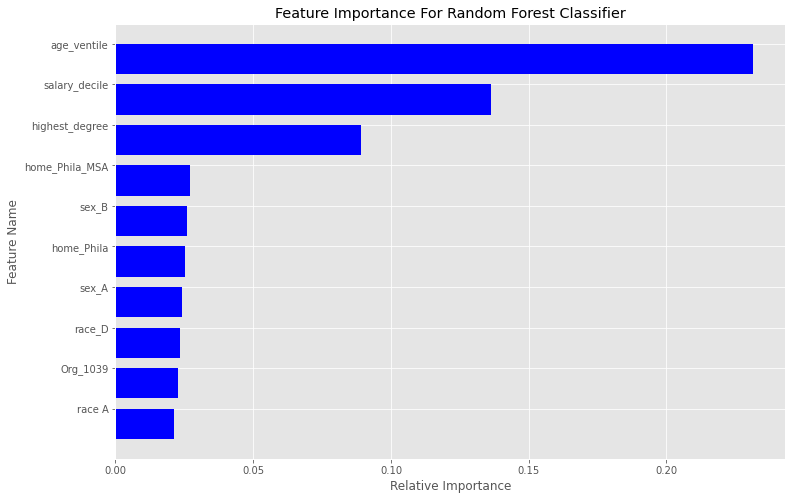

In [ ]:
fig, ax = plt.subplots()   
fig.set_size_inches(12, 8)
width = 0.75 # the width of the bars 
ind = np.arange(len(feature_importance))  # the x locations for the groups
ax.barh(ind, feature_importance, width, color="blue")
ax.set_yticks(ind + width/2)
ax.set_yticklabels(feature_names, minor=False)
plt.title('Feature Importance For Random Forest Classifier')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Name')   

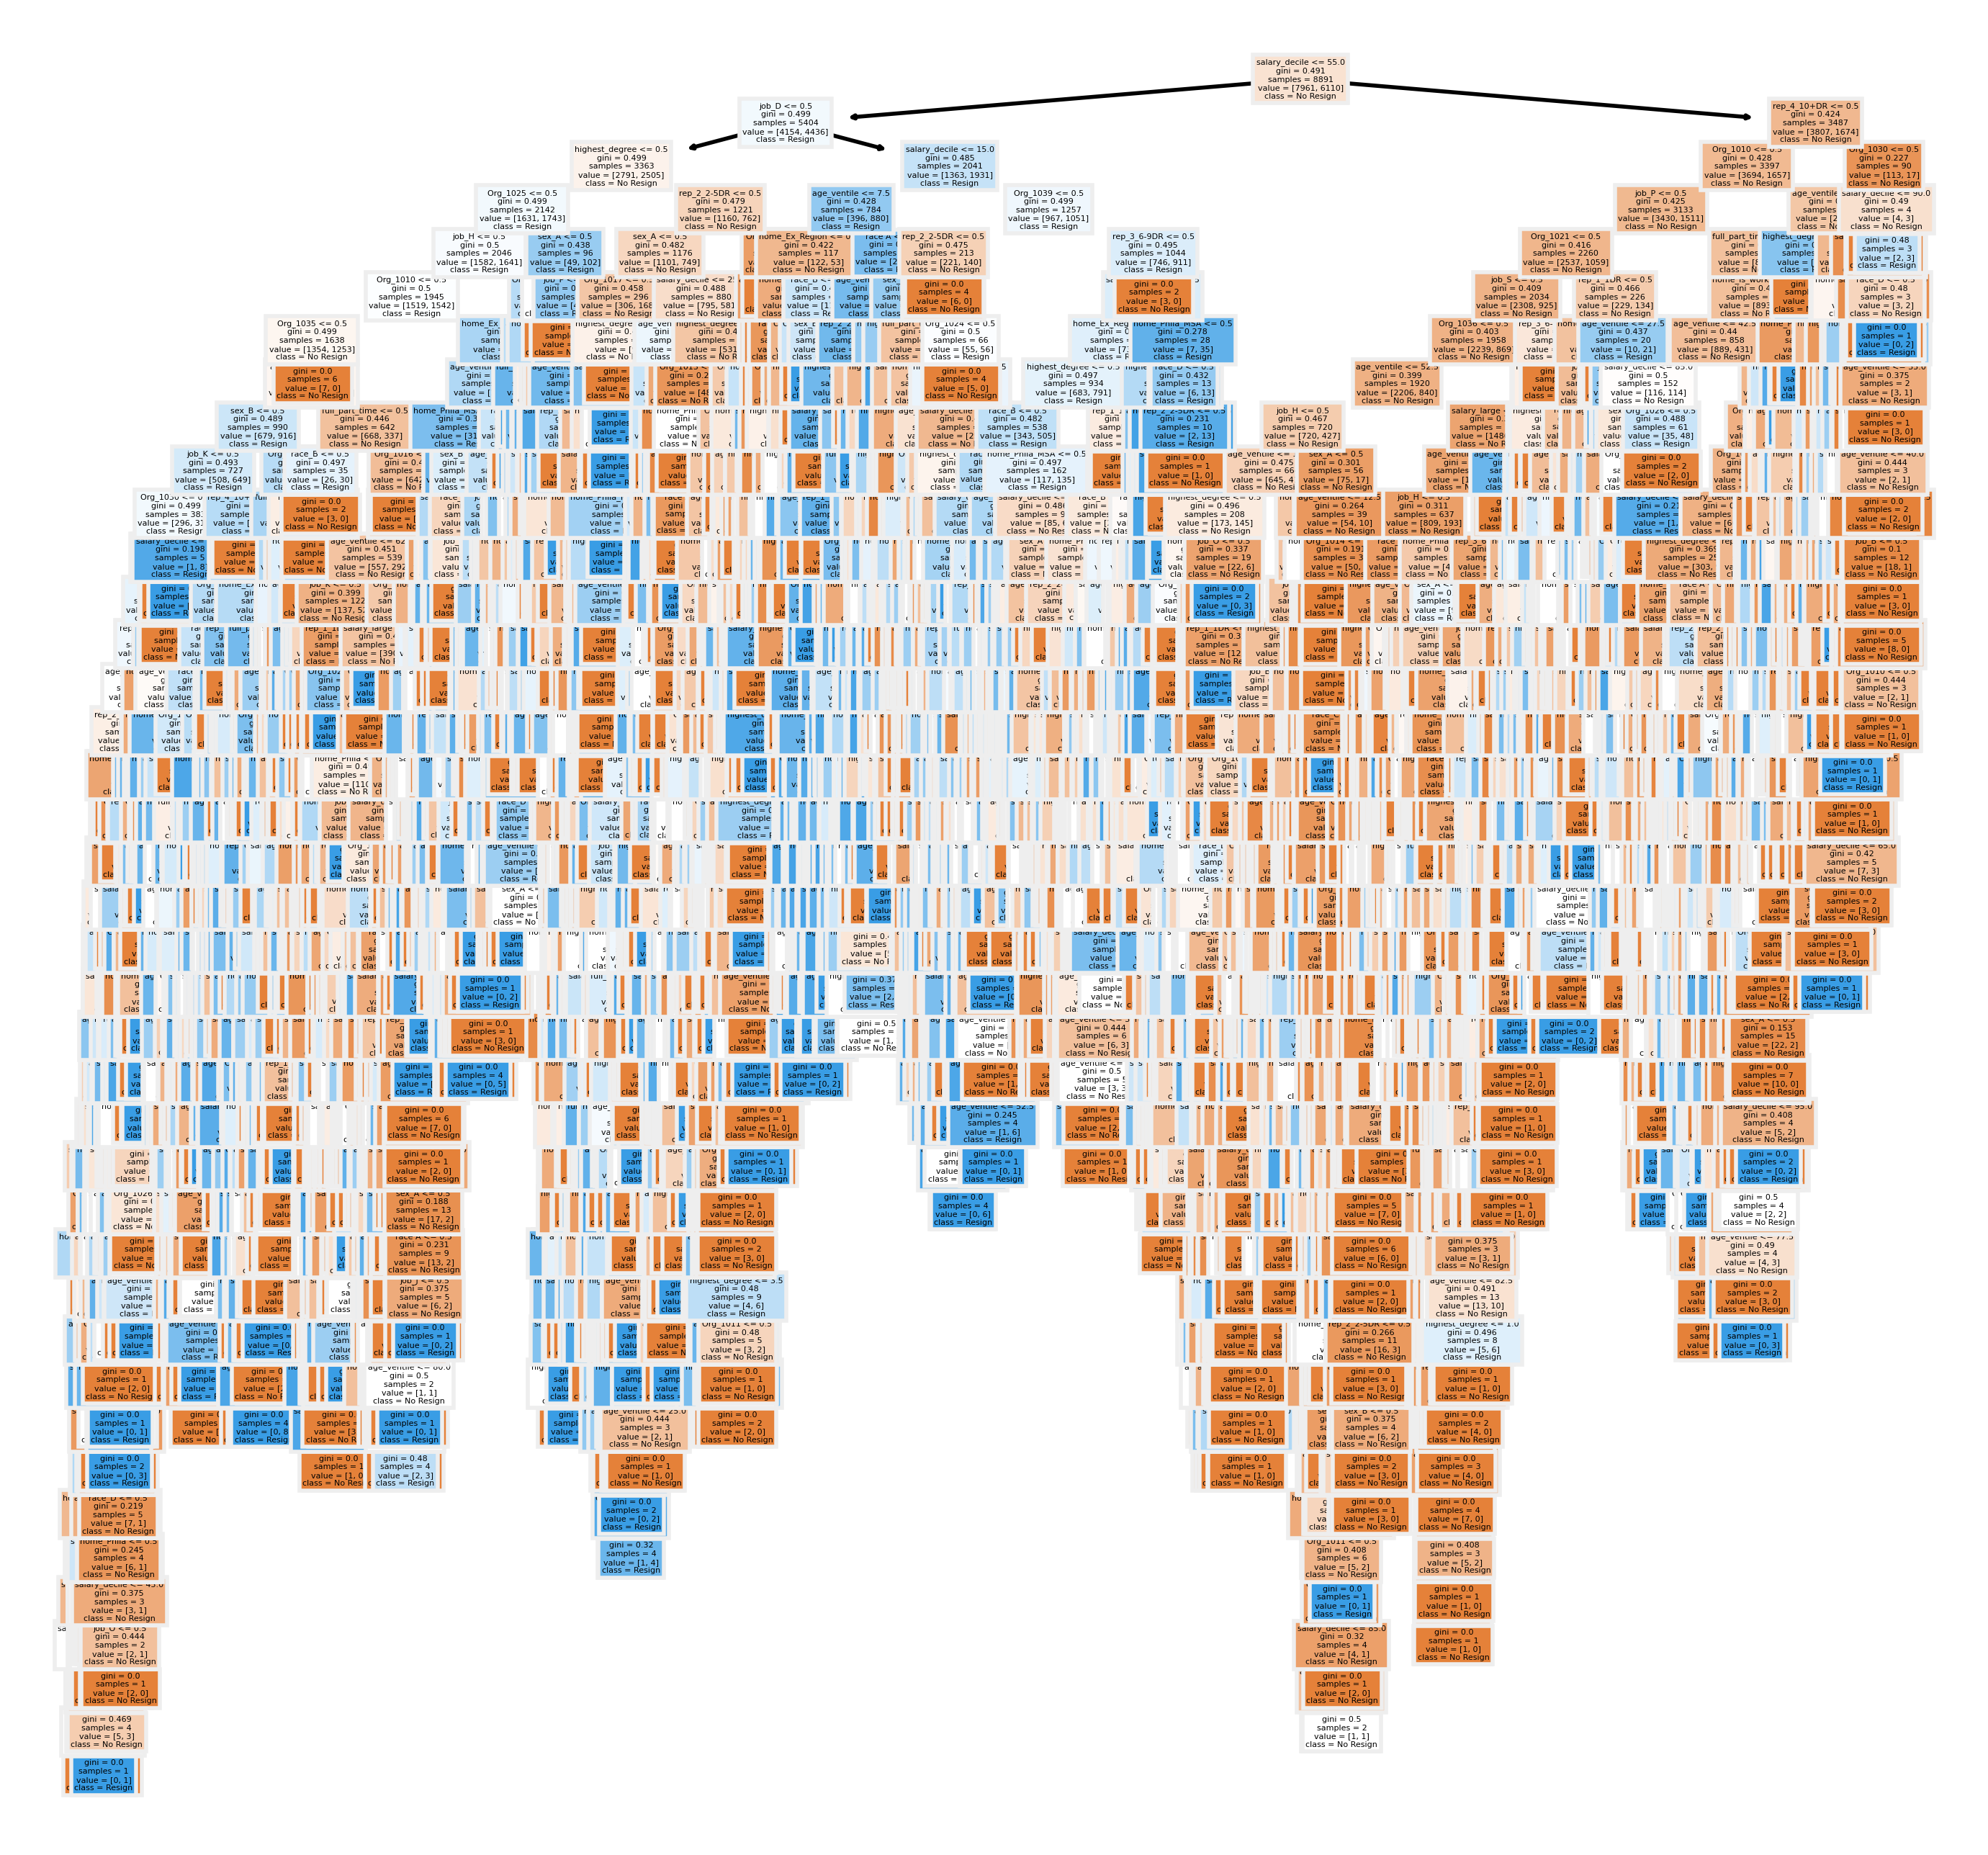

In [ ]:
from sklearn import tree

fn=X_train.columns
cn=["No Resign", "Resign"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf_rfc.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('rf_individualtree.png')

In [ ]:
feature_importance = gcv_xgb.feature_importances_
feature_names = gcv_xgb.feature_names_in_
feature_names = [x for _,x in sorted(zip(feature_importance, feature_names), key=lambda pair: pair[0])]
feature_importance.sort()
feature_importance = feature_importance[-10:]
feature_names = feature_names[-10:]

Text(0, 0.5, 'Feature Name')

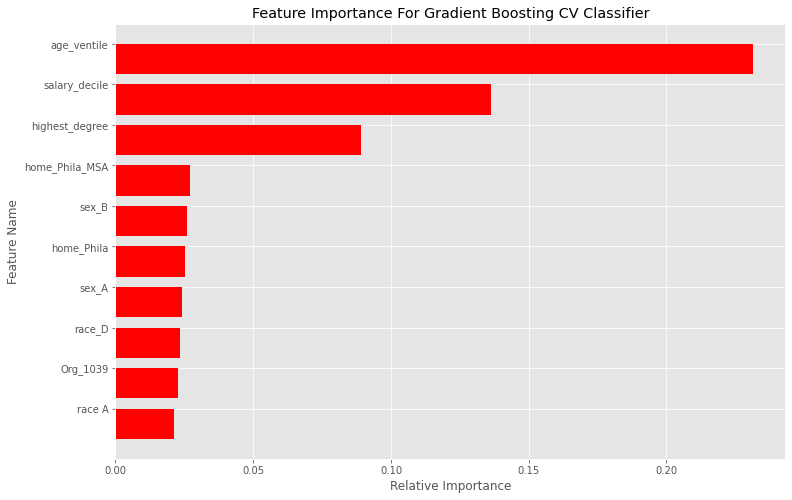

In [ ]:
fig, ax = plt.subplots()    
fig.set_size_inches(12, 8)
width = 0.75 # the width of the bars 
ind = np.arange(len(feature_importance))  # the x locations for the groups
ax.barh(ind, feature_importance, width, color="red")
ax.set_yticks(ind + width/2)
ax.set_yticklabels(feature_names, minor=False)
plt.title('Feature Importance For Gradient Boosting CV Classifier')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Name')   

# Applying PCA

In [ ]:
X_train_scaled = preprocessing.StandardScaler().fit_transform(X_train)
X_train_red = PCA(n_components = 10).fit_transform(X_train_scaled)

X_test_scaled = preprocessing.StandardScaler().fit_transform(X_test)
X_test_red = PCA(n_components = 10).fit_transform(X_test_scaled)

SVC with PCA

SVC

In [ ]:
Cs = [0.001, 0.01, 0.1, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 10]
gammas = [0.001, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 1]
degrees = [0.5, 1, 2, 3, 4, 5]
poly_param_grid = {'degree': degrees}
param_grid = {'C': Cs, 'gamma' : gammas}

In [ ]:
clf_svm = SVC(random_state = 42).fit(X_train_red, y_train.values.ravel())

In [ ]:
print(model_info(clf_svm, X_train_red, y_train.values.ravel(), "SVC", "train"))
print(model_info(clf_svm, X_test_red, y_test, "SVC", "test"))

SVC train data: accuracy = 0.654, recall = 0.447, precision = 0.634
SVC test data: accuracy = 0.624, recall = 0.387, precision = 0.56


In [ ]:
linear_svc = SVC(kernel='linear', random_state = 42)
rbf_svc = SVC(kernel = 'rbf', random_state = 42)
poly_svc = SVC(kernel='poly', random_state=42)

In [ ]:
linear_svm_basic = SVC(kernel='linear', random_state = 42).fit(X_train_red, y_train.values.ravel())
rbf_svm_basic = SVC(kernel = 'rbf', random_state = 42).fit(X_train_red, y_train.values.ravel())
poly_svm_basic = SVC(kernel='poly', random_state=42).fit(X_train_red, y_train.values.ravel())

In [ ]:
print(model_info(linear_svm_basic, X_train_red, y_train.values.ravel(), "linear_svm_basic", "train"))
print(model_info(linear_svm_basic, X_test_red, y_test, "linear_svm_basic", "test"))
print("\n")
print(model_info(rbf_svm_basic, X_train_red, y_train.values.ravel(), "rbf_svm_basic", "train"))
print(model_info(rbf_svm_basic, X_test_red, y_test, "rbf_svm_basic", "test"))
print("\n")
print(model_info(poly_svm_basic, X_train_red, y_train.values.ravel(), "poly_svm_basic", "train"))
print(model_info(poly_svm_basic, X_test_red, y_test, "poly_svm_basic", "test"))

linear_svm_basic train data: accuracy = 0.616, recall = 0.334, precision = 0.588
linear_svm_basic test data: accuracy = 0.617, recall = 0.333, precision = 0.555


rbf_svm_basic train data: accuracy = 0.654, recall = 0.447, precision = 0.634
rbf_svm_basic test data: accuracy = 0.624, recall = 0.387, precision = 0.56


poly_svm_basic train data: accuracy = 0.627, recall = 0.309, precision = 0.626
poly_svm_basic test data: accuracy = 0.607, recall = 0.284, precision = 0.54


Linear SVC

In [ ]:
linear_clf = RandomizedSearchCV(estimator=linear_svc, param_distributions = param_grid, scoring='accuracy', n_jobs = -1, cv = 3)
linear_clf.fit(X_train_red, y_train.values.ravel())
linear_gamma = linear_clf.best_params_['gamma']
linear_C = linear_clf.best_params_['C']
print((linear_C, linear_gamma))


(3, 0.2)


In [ ]:
lin_svm = SVC(kernel = 'linear', C = 3, gamma = 0.2, random_state = 42).fit(X_train_red, y_train.values.ravel())

In [ ]:
print(model_info(lin_svm, X_train_red, y_train.values.ravel(), "lin_svm", "train"))
print(model_info(lin_svm, X_test_red, y_test, "lin_svm", "test"))

lin_svm train data: accuracy = 0.616, recall = 0.334, precision = 0.588
lin_svm test data: accuracy = 0.617, recall = 0.333, precision = 0.556


Radial SVC

In [ ]:
rbf_clf = RandomizedSearchCV(estimator=rbf_svc, param_distributions = param_grid, scoring='accuracy', n_jobs = -1, cv = 3)
rbf_clf.fit(X_train_red, y_train.values.ravel())
rbf_gamma = rbf_clf.best_params_['gamma']
rbf_C = rbf_clf.best_params_['C']
print((rbf_C, rbf_gamma))

(2.75, 0.2)


In [ ]:
rbf_svm = SVC(C = 2.75, gamma = 0.2, random_state = 42, kernel = 'rbf').fit(X_train_red, y_train.values.ravel())

In [ ]:
print(model_info(rbf_svm, X_train_red, y_train.values.ravel(), "rbf_svm", "train"))
print(model_info(rbf_svm, X_test_red, y_test, "rbf_svm", "test"))

rbf_svm train data: accuracy = 0.743, recall = 0.673, precision = 0.71
rbf_svm test data: accuracy = 0.616, recall = 0.444, precision = 0.54


Poly SVC

In [ ]:
poly_clf = RandomizedSearchCV(estimator=poly_svc, param_distributions = poly_param_grid, scoring='accuracy', n_jobs = -1, cv = 3)
poly_clf.fit(X_train_red, y_train.values.ravel())
poly_deg = poly_clf.best_params_['degree']
print(poly_deg)

In [ ]:
poly_svm = SVC(C = 2.75, gamma = 0.2, random_state = 42, kernel = 'poly', degree = 3).fit(X_train_red, y_train.values.ravel())

In [ ]:
print(model_info(poly_svm, X_train_red, y_train.values.ravel(), "poly_svm", "train"))
print(model_info(poly_svm, X_test_red, y_test, "poly_svm", "test"))

poly_svm train data: accuracy = 0.641, recall = 0.407, precision = 0.62
poly_svm test data: accuracy = 0.604, recall = 0.347, precision = 0.526
